# 1. Check Dependencies are Installed in our venv

In [75]:
!pip list #check list of Dependencies

Package                      Version
---------------------------- ---------
absl-py                      2.0.0
asttokens                    2.4.0
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.3.1
certifi                      2023.7.22
charset-normalizer           3.2.0
colorama                     0.4.6
comm                         0.1.4
contourpy                    1.1.1
cycler                       0.11.0
debugpy                      1.8.0
decorator                    5.1.1
exceptiongroup               1.1.3
executing                    1.2.0
flatbuffers                  23.5.26
fonttools                    4.42.1
gast                         0.4.0
google-auth                  2.23.1
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.58.0
h5py                         3.9.0
idna                         3.4
importlib-metadata           6.8.0
importlib-resources          6.1.0
ipyker

# 1. Install Dependencies and Setup

In [76]:
!pip install tensorflow opencv-python matplotlib

In [77]:
!pip list #check list agin

Package                      Version
---------------------------- ---------
absl-py                      2.0.0
asttokens                    2.4.0
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.3.1
certifi                      2023.7.22
charset-normalizer           3.2.0
colorama                     0.4.6
comm                         0.1.4
contourpy                    1.1.1
cycler                       0.11.0
debugpy                      1.8.0
decorator                    5.1.1
exceptiongroup               1.1.3
executing                    1.2.0
flatbuffers                  23.5.26
fonttools                    4.42.1
gast                         0.4.0
google-auth                  2.23.1
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.58.0
h5py                         3.9.0
idna                         3.4
importlib-metadata           6.8.0
importlib-resources          6.1.0
ipyker

In [78]:
import tensorflow as tf #import tensorflow as tf
import os #import os

In [79]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpuList = tf.config.experimental.list_physical_devices('GPU') # get all of physical GPU devices allowcated for tensaflow
for gpu in gpuList: 
    tf.config.experimental.set_memory_growth(gpu, True) # limit the GPU memory growth getting one by one from gpu List

In [80]:
tf.config.list_physical_devices('GPU') #check physical GPU devices

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Delete any questionable photos.

In [81]:
import cv2
import imghdr

In [82]:
data_directory = '..\data' #give path of data directory

In [83]:
image_types = ['jpeg','jpg', 'bmp', 'png'] #store extentions of exist data types

In [84]:
for image_class in os.listdir(data_directory): #get list of directories inside the data directory ex:-['happy','sad']
    for image in os.listdir(os.path.join(data_directory, image_class)):#get every single image from data sub directories -> '../data/happy' -> 465464.png
        image_path = os.path.join(data_directory, image_class, image)#create a new path for image inside of data sub directory 
        try: 
            img = cv2.imread(image_path)#loads an image from the specified file
            tip = imghdr.what(image_path)
            if tip not in image_types: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)# os will remove image from listed image path in here
        except Exception as e: 
            print('Issue with image {}'.format(image_path))# if got an error exception will print it is as an issue

# 3. Load Data

In [85]:
import numpy as np #import numpy as np
from matplotlib import pyplot as plt #import pyplot as plt

In [86]:
data = tf.keras.utils.image_dataset_from_directory(data_directory) #Generates a tf.data.Dataset from image files in a directory.

Found 4 files belonging to 3 classes.


In [87]:
data_iterator = data.as_numpy_iterator() #image_dataset_from_directory returns a Dataset object and get it as an as_numpy_iterator

In [88]:
batch = data_iterator.next() #To get the next batch, and the next image

In [89]:
batch[0].shape

(4, 256, 256, 3)

In [93]:
# Class 0 - ANGRY
# Class 1 - HAPPY
# Class 2 - SAD
batch[1]

array([0, 1, 1, 2])

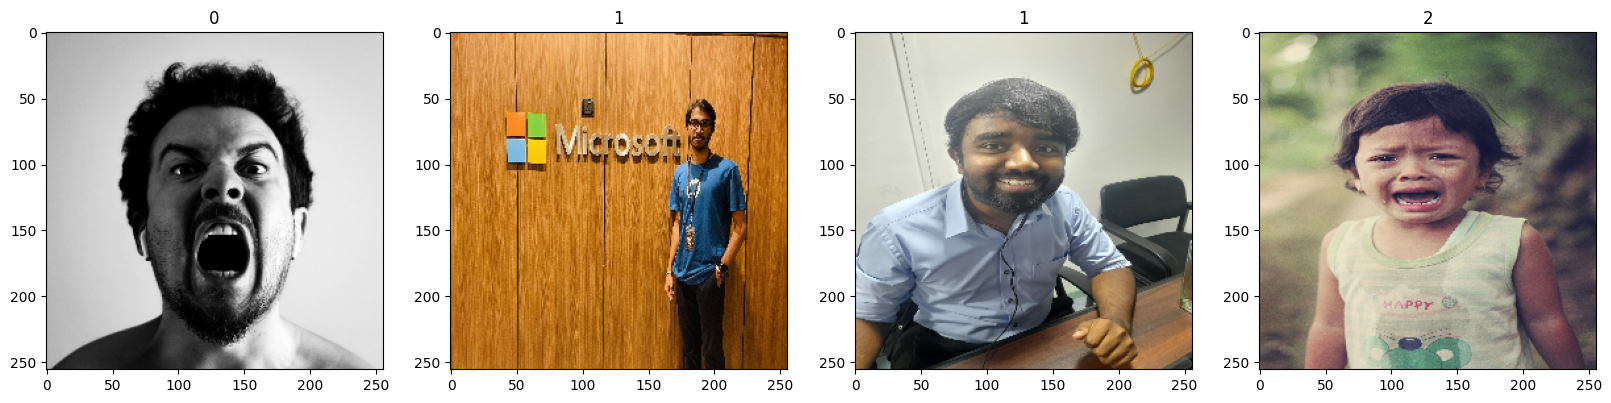

In [94]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20)) # create common layouts of subplots, including the enclosing figure object, in a single call.
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])